In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
# Perform API Calls

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).
url = "http://api.openweathermap.org/data/2.5/weather?"
url_query = url+"appid="+ weather_api_key + "&q=" + 'Atlanta'
result = requests.get(url_query).json()
result

{'coord': {'lon': -84.388, 'lat': 33.749},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 287.62,
  'feels_like': 287.32,
  'temp_min': 285.47,
  'temp_max': 289.64,
  'pressure': 1010,
  'humidity': 84},
 'visibility': 10000,
 'wind': {'speed': 0, 'deg': 0},
 'clouds': {'all': 75},
 'dt': 1641163741,
 'sys': {'type': 2,
  'id': 2006620,
  'country': 'US',
  'sunrise': 1641127351,
  'sunset': 1641163223},
 'timezone': -18000,
 'id': 4180439,
 'name': 'Atlanta',
 'cod': 200}

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Empty list to hold value from response
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
print("-----------------------------")
print("Beginning Data Retrieval.")
print("-----------------------------")

i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
#Extracting data 
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")
        
print("-----------------------------")
print("Data Retrieval Complete.")
print("-----------------------------")


-----------------------------
Beginning Data Retrieval.
-----------------------------
Processing record 1|atuona
Processing record 2|bluff
Processing record 3|kaitangata
Processing record 4|qaanaaq
City not found. skipping.
Processing record 5|saskylakh
Processing record 6|albany
Processing record 7|vaini
Processing record 8|mbandaka
Processing record 9|sao filipe
Processing record 10|avarua
Processing record 11|yellowknife
Processing record 12|hasaki
Processing record 13|atwater
Processing record 14|hilo
Processing record 15|busselton
City not found. skipping.
City not found. skipping.
Processing record 16|longyearbyen
Processing record 17|mar del plata
City not found. skipping.
Processing record 18|mahebourg
Processing record 19|petropavlovsk-kamchatskiy
Processing record 20|manohar thana
Processing record 21|jamestown
City not found. skipping.
Processing record 22|naze
Processing record 23|cabo san lucas
Processing record 24|wuxue
Processing record 25|mendi
Processing record 26|mezi

Processing record 246|upernavik
City not found. skipping.
City not found. skipping.
Processing record 247|moree
Processing record 248|cacu
Processing record 249|shizunai
Processing record 250|katsuura
Processing record 251|maunabo
Processing record 252|laem sing
Processing record 253|goundam
Processing record 254|carutapera
Processing record 255|kiama
Processing record 256|bandarbeyla
Processing record 257|dera ismail khan
Processing record 258|san vicente
Processing record 259|campbell river
Processing record 260|kitimat
Processing record 261|lorengau
Processing record 262|sinjai
Processing record 263|kavieng
Processing record 264|severo-kurilsk
Processing record 265|comodoro rivadavia
Processing record 266|norman wells
Processing record 267|namatanai
Processing record 268|batemans bay
Processing record 269|port-cartier
Processing record 270|tromso
Processing record 271|pleshanovo
Processing record 272|buta
Processing record 273|vila velha
Processing record 274|hambantota
Processing r

Processing record 492|cachira
Processing record 493|jawhar
Processing record 494|willowmore
Processing record 495|gisborne
Processing record 496|sacramento
Processing record 497|puerto del rosario
City not found. skipping.
Processing record 498|ginir
Processing record 499|nizhnekamsk
Processing record 500|kollegal
Processing record 501|bermejillo
Processing record 502|hohhot
Processing record 503|kenai
Processing record 504|araouane
Processing record 505|uige
Processing record 506|maniitsoq
Processing record 507|quatre cocos
Processing record 508|port hardy
City not found. skipping.
Processing record 509|viedma
Processing record 510|sazonovo
Processing record 511|luwuk
Processing record 512|rocky mountain house
Processing record 513|ouesso
Processing record 514|henties bay
Processing record 515|rapar
Processing record 516|charters towers
Processing record 517|mbaiki
Processing record 518|banda aceh
Processing record 519|naica
City not found. skipping.
Processing record 520|okhotsk
Proc

In [13]:
city_df = pd.DataFrame({"City":city_name, 
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Humidity":humidity,
                        "Cloudiness":cloudiness,
                        "Wind Speed":wind_speed,
                        "Country":country, 
                        "Date":date, 
                       })
city_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.93,68,18,19.89,PF,1641164516
1,Bluff,-46.6000,168.3333,70.81,73,100,2.08,NZ,1641164517
2,Kaitangata,-46.2817,169.8464,69.93,61,100,5.86,NZ,1641164517
3,Qaanaaq,77.4840,-69.3632,-4.25,70,88,7.90,GL,1641164517
4,Saskylakh,71.9167,114.0833,-46.64,100,95,2.77,RU,1641164518


In [17]:
city_df.to_csv("../cities_output.csv", encoding="utf-8", index=False)

In [ ]:
date = time.strftime("%m/%d/%Y")

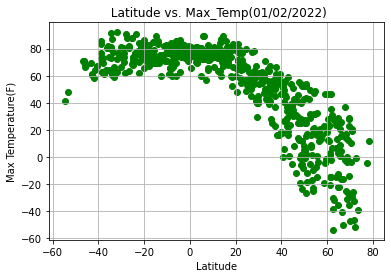

In [20]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "green")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title(f" Latitude vs. Max_Temp({date})")
plt.savefig("Fig_01_Temperature_latitude.png")
plt.show()

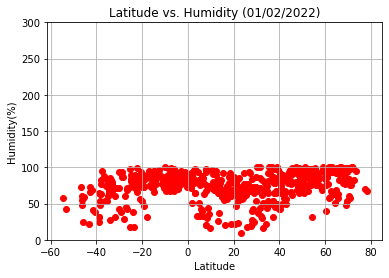

In [21]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "red")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"Latitude vs. Humidity ({date})")
plt.ylim(0, 300)
plt.savefig("Fig_02_Humidity vs Latitude.png")
plt.show()

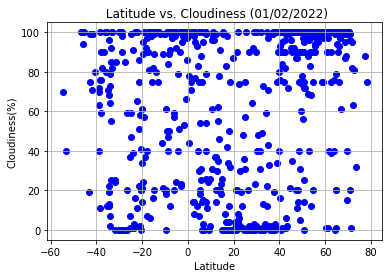

In [22]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f" Latitude vs. Cloudiness ({date})")
plt.savefig("Fig_03_cloudiness vs Latitude.png")
plt.show()

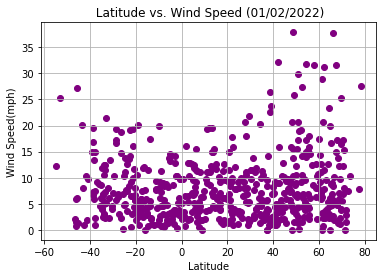

In [23]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "purple")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f" Latitude vs. Wind Speed ({date})")
plt.savefig("Fig_04_cloudiness vs Latitude.png")
plt.show()

In [31]:
# dataframes for Northern and Southern Hemisphere
Northern_hemisphere_df = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere_df = city_df.loc[city_df["Lat"]<0]

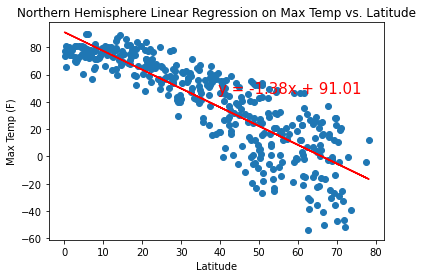

In [36]:
x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title('Northern Hemisphere Linear Regression on Max Temp vs. Latitude')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

In [40]:
print("Analysis on Northern Hemisphere Linear Regression for Max Temp vs. Latitude:")
print("----------------------------------------------------------------------------")
print(f"1.The r-squared is: {rvalue}")
print("2.In the Northern Hemisphere temperature decreases while increasing latitude.")
print("3.The regression displays a negative correlation.")

Analysis on Northern Hemisphere Linear Regression for Max Temp vs. Latitude:
----------------------------------------------------------------------------
1.The r-squared is: -0.8486359846548664
2.In the Northern Hemisphere temperature decreases while increasing latitude.
3.The regression displays a negative correlation.


Text(0.5, 1.0, 'Southern Hemisphere Linear Regression on Max Temp vs. Latitude')

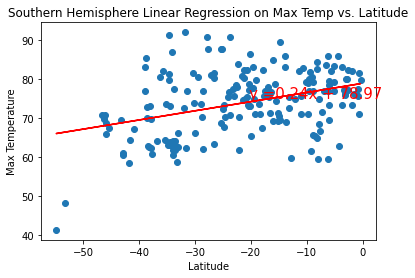

In [44]:
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere Linear Regression on Max Temp vs. Latitude')

In [43]:
print("Analysis on Southern Hemisphere Linear Regression for Max Temp vs. Latitude:")
print("----------------------------------------------------------------------------")
print(f"1.The r-squared is: {rvalue}")
print("2.In the Northern Hemisphere temperature increases while increasing latitude.")
print("3.The regression displays a positive correlation.")

Analysis on Southern Hemisphere Linear Regression for Max Temp vs. Latitude:
----------------------------------------------------------------------------
1.The r-squared is: 0.37145774296299783
2.In the Northern Hemisphere temperature increases while increasing latitude.
3.The regression displays a positive correlation.


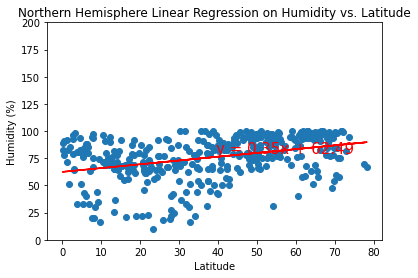

In [45]:
x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title('Northern Hemisphere Linear Regression on Humidity vs. Latitude')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, y_values.max()+100)
plt.show()

In [47]:
print("Analysis on Northern Hemisphere Linear Regression for latitude vs. Humidity:")
print("----------------------------------------------------------------------------")
print(f"1.The r-squared is: {rvalue}")
print("2.The regression displays a positive correlation.")

Analysis on Northern Hemisphere Linear Regression for latitude vs. Latitude:
----------------------------------------------------------------------------
1.The r-squared is: 0.36226723347469886
2.The regression displays a positive correlation.


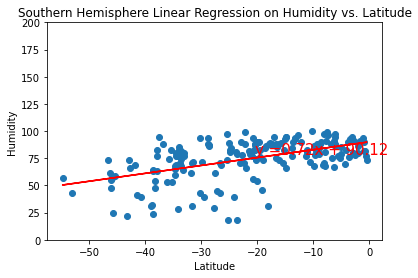

In [61]:
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(0, y_values.max()+100)
plt.title('Southern Hemisphere Linear Regression on Humidity vs. Latitude')
plt.show()

In [54]:
print("Analysis on southern Hemisphere Linear Regression for latitude vs.Humidity:")
print("----------------------------------------------------------------------------")
print(f"1.The r-squared is: {rvalue}")
print("2.The regression displays a positive correlation.")

Analysis on southern Hemisphere Linear Regression for latitude vs. Latitude:
----------------------------------------------------------------------------
1.The r-squared is: 0.5251855837599558
2.The regression displays a positive correlation.


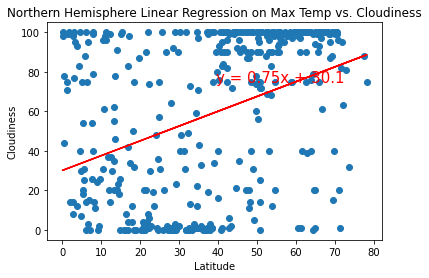

In [55]:
x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title('Northern Hemisphere Linear Regression on Max Temp vs. Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

In [56]:
print("Analysis on Northern Hemisphere Linear Regression for latitude vs. Cloudiness:")
print("----------------------------------------------------------------------------")
print(f"1.The r-squared is: {rvalue}")
print("2.The regression displays a positive correlation.")

Analysis on Northern Hemisphere Linear Regression for latitude vs. Cloudiness:
----------------------------------------------------------------------------
1.The r-squared is: 0.3896076697756492
2.The regression displays a positive correlation.


Text(0.5, 1.0, 'Southern Hemisphere Linear Regression on Cloudiness vs. Latitude')

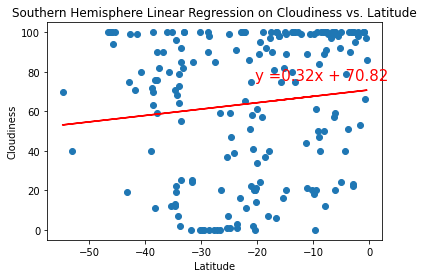

In [57]:
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Linear Regression on Cloudiness vs. Latitude')

In [58]:
print("Analysis on Southern Hemisphere Linear Regression for latitude vs. Cloudiness:")
print("----------------------------------------------------------------------------")
print(f"1.The r-squared is: {rvalue}")
print("2.The regression displays a positive correlation.")

Analysis on Southern Hemisphere Linear Regression for latitude vs. Cloudiness:
----------------------------------------------------------------------------
1.The r-squared is: 0.11724396067787202
2.The regression displays a positive correlation.


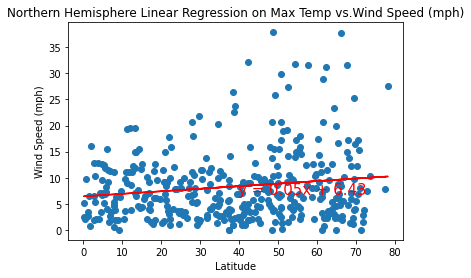

In [59]:
x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title('Northern Hemisphere Linear Regression on Max Temp vs.Wind Speed (mph)')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

In [60]:
print("Analysis on Northern Hemisphere Linear Regression for latitude vs. Wind Speed:")
print("----------------------------------------------------------------------------")
print(f"1.The r-squared is: {rvalue}")
print("2.The regression displays a positive correlation.")

Analysis on Northern Hemisphere Linear Regression for latitude vs. Wind Speed:
----------------------------------------------------------------------------
1.The r-squared is: 0.15312761397006455
2.The regression displays a positive correlation.


Text(0.5, 1.0, 'Southern Hemisphere Linear Regression on Wind Speed(mph) vs. Latitude')

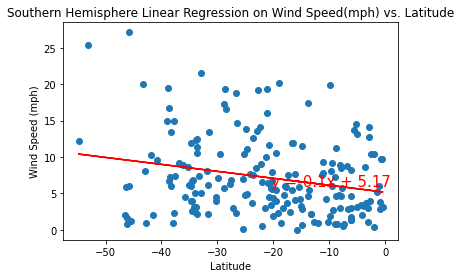

In [62]:
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Linear Regression on Wind Speed(mph) vs. Latitude')

In [63]:
print("Analysis on Southern Hemisphere Linear Regression for latitude vs. Wind Speed:")
print("----------------------------------------------------------------------------")
print(f"1.The r-squared is: {rvalue}")
print("2.The regression displays a negative correlation.")

Analysis on Southern Hemisphere Linear Regression for latitude vs. Wind Speed:
----------------------------------------------------------------------------
1.The r-squared is: -0.23319358015578903
2.The regression displays a negative correlation.
